# Applied Data Visaulization Lecture 4: Data Wrangling Recap, Basic Plotting


In this lecture we'll recap some key aspects from the first technical lecture, and then introduce visualization with Matplotlib. 

## List Comprehension

We can, for example, use functions in place of a variable. Here we initialize an array of random numbers in the unit interval:

In [1]:
import random
rands = [random.random() for _ in range(10)]
rands

[0.16379652586513216,
 0.6742034201571735,
 0.8055940452815691,
 0.5783689476866557,
 0.8371564928597358,
 0.09718771310836061,
 0.7680083053605409,
 0.8879295980829625,
 0.8659726629534645,
 0.5936234694655763]

You can also use list comprehension to create a list based on another list:

In [2]:
[x*10 for x in rands]

[1.6379652586513216,
 6.742034201571735,
 8.05594045281569,
 5.783689476866557,
 8.371564928597358,
 0.9718771310836061,
 7.680083053605409,
 8.879295980829625,
 8.659726629534646,
 5.936234694655763]

## Exercise List Comprehension: 

Write a  list comprehension expression that takes the list `numbers` and returns a list with `[True, False]` where `True` is given to positive values, and `False` is given to values of 0 or smaller.

In [5]:
# Your code
numbers = [-3, 2, 5, -9, 13, 19, 0]

# Pandas Series

In [6]:
import pandas as pd

In [7]:

bands = pd.Series(["Stones", "Beatles", "Zeppelin", "Pink Floyd"])
bands

0        Stones
1       Beatles
2      Zeppelin
3    Pink Floyd
dtype: object

In [8]:
founded = pd.Series([1962, 1960, 1968, 1965])
founded

0    1962
1    1960
2    1968
3    1965
dtype: int64

In [9]:
# the data is the first parameter, the index is given by the index keyword
bands_founded = pd.Series([1962, 1960, 1968, 1965, 2012],
                          index=["Stones", "Beatles", "Zeppelin", "Pink Floyd", "Pink Floyd"], 
                          name="Bands founded")
bands_founded

Stones        1962
Beatles       1960
Zeppelin      1968
Pink Floyd    1965
Pink Floyd    2012
Name: Bands founded, dtype: int64

Remember that you can use indices for keys: 

| Index | Value | 
| - | - |
| Stones     |    1962
| Beatles    |    1960
| Zeppelin     |  1968
| Pink Floyd |    1965
| Pink Floyd |    2012

Here we see something interesting: We've used the same index (Pink Floyd) twice, once for the original founding of the band, and once for the re-union starting in 2012. Also, the order of the entries is preserved. 

A series is both, a list and a dictionary! 

### Indexing and slicing

Indexing and slicing works largely like in normal python, but instead of just directly using the bracket notations, it is recommended to use `iloc` for indexing by position and `loc` for indexing by labelled indices. 

In [10]:
# slicing by position
bands_founded.iloc[1:3]

Beatles     1960
Zeppelin    1968
Name: Bands founded, dtype: int64

When slicing by labelled index, the last value specified is *included*, which differs from regular Python slicing behavior.

In [11]:
# slicing by index
bands_founded.loc["Zeppelin" : "Pink Floyd"]

Zeppelin      1968
Pink Floyd    1965
Pink Floyd    2012
Name: Bands founded, dtype: int64

Again, for series (not for data frames), `loc` and just using bracket notation is identical: 

In [12]:
bands[2:17]

2      Zeppelin
3    Pink Floyd
dtype: object

### Masking and Filtering

With pandas we can create boolean arrays that we can use to mask and filter a dataset. In the following expression, we'll create a new array that has "True" for every band formed after 1964:

In [13]:
mask = bands_founded > 1964
mask

Stones        False
Beatles       False
Zeppelin       True
Pink Floyd     True
Pink Floyd     True
Name: Bands founded, dtype: bool

This uses a technique called **broadcasting**. We can use broadcasting with various operations:

In [14]:
# Not particularly useful for this dataset..
founding_months = bands_founded * 12
founding_months

Stones        23544
Beatles       23520
Zeppelin      23616
Pink Floyd    23580
Pink Floyd    24144
Name: Bands founded, dtype: int64

And we can combine broadcasting and filtering: 

In [15]:
bands_founded[bands_founded > 1967]

Zeppelin      1968
Pink Floyd    2012
Name: Bands founded, dtype: int64

## Exploring a Series

There are various way we can explore a series. 

We can also get an overview of the statistical properties of a series: 

In [16]:
numbers = pd.Series([1962, 1960, 1968, 1965, 2012, None, 2016])
numbers.describe()

count       6.000000
mean     1980.500000
std        26.120873
min      1960.000000
25%      1962.750000
50%      1966.500000
75%      2001.000000
max      2016.000000
dtype: float64

Note that None/NaN values are ignored here. We can drop all NaN values if we desire:

In [17]:
numbers = numbers.dropna()
numbers

0    1962.0
1    1960.0
2    1968.0
3    1965.0
4    2012.0
6    2016.0
dtype: float64

This works also for non-numerical data. Of course, we get different measures:

## Sorting 

We can sort a series:

In [20]:
sorted_numbers = numbers.sort_values(ascending=False)
sorted_numbers

6    2016.0
4    2012.0
2    1968.0
3    1965.0
0    1962.0
1    1960.0
dtype: float64

Note that the indices remain the same! We can **reset the indices**:

In [22]:
# If we don't specify drop to be true, the previous indices are preserved in a separte column
sorted_numbers = sorted_numbers.reset_index(drop=True)
sorted_numbers

,index,0
0,6,2016.0
1,4,2012.0
2,2,1968.0
3,3,1965.0
4,0,1962.0
5,1,1960.0


## Applying a Function

Often, we will want to apply a function to all values of a Series. We can do that with the [`map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function:

In [26]:
import datetime

# Convert an integer year into a date, assuming Jan 1 as day and month.
def to_date(year):
    return datetime.date(int(year), 1, 1)
    
sorted_numbers.map(to_date)

0    2016-01-01
1    2012-01-01
2    1968-01-01
3    1965-01-01
4    1962-01-01
5    1960-01-01
dtype: object

### Exercise: Pandas Series

Create a new pandas series with the lists given below that contain NFL team names and the number of Super Bowl titles they won. Use the names as indices, the wins as the data.

 * Once the list is created, sort the series alphabetically by index. 
 * Print an overview of the statistical properties of the series. What's the mean number of wins?
 * Filter out all teams that have won less than four Super Bowl titles
 * A football team has 45 players. Update the series so that instead of the number of titles, it reflects the number of Super Bowl rings given to the players. 
 * Assume that each ring costs USD 30,000. Update the series so that it contains a string of the dollar amount including the \$ sign. For the Steelers, for example, this would correspond to: 
 ```
 Pittsburgh Steelers             $ 8100000
 ```


In [94]:
teams = ["New England Patriots",
         "Pittsburgh Steelers",
         "Dallas Cowboys",
         "San Francisco 49ers",
         "Green Bay Packers",
         "New York Giants",
         "Denver Broncos",
         "Oakland/Los Angeles Raiders",
         "Washington Redskins",
         "Miami Dolphins",
         "Baltimore/Indianapolis Colts",
         "Baltimore Ravens"]
wins = [6,6,5,5,4,4,3,3,3,2,2,2]

In [95]:
# Your code

# Data Frames

Before we look at dataframes, let's just load some data from a file.

In [26]:
hit_albums = pd.read_csv("hit_albums.csv")
hit_albums

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65.0
1,AC/DC,Back in Black,1980,Hard rock,25.9,50.0
2,Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45.0
3,Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44.0
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43.0
...,...,...,...,...,...,...
72,Tracy Chapman,Tracy Chapman,1988,Folk rock,20.0,NaN
73,Usher,Confessions,2004,R&B,20.0,NaN
74,Various artists,Flashdance: Original Soundtrack from the Motio...,1983,Soundtrack,20.0,NaN
75,Whitney Houston,Whitney,1987,"Pop, R&B",20.0,NaN


Pandas provides the insanely powerful ['read_csv()'](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) method. Also see [the documentation](http://pandas.pydata.org/pandas-docs/stable/io.html) for more info on all I/O operations in pandas, including writing CSV files. 

You can pass a lot of arguments to the method, such as delimiter, quote-chars, etc., but for our case the default parameters just worked. 

We've also just created our first data frame! Let's look at data frames in detail next. 

In [23]:
bandInfo = pd.DataFrame({
        "Name":["Led Zeppelin", "The Beatles", "Rolling Stones", "Radiohead"],
        "No Members":[4, 4, 4, 5],
        "No Albums":[9, 12, 29 ,9]
    })
bandInfo

,Name,No Members,No Albums
0,Led Zeppelin,4,9
1,The Beatles,4,12
2,Rolling Stones,4,29
3,Radiohead,5,9


This dataframe was initialized with a dictonary of column headers as keys and column data as values.

Just as a series, a data frame has an index, which corresponds to the first column here. In this case the index was automatically generated, but as for the series, we could use explicit values for the index. 

And obviously, we can do all the things we've learned about to this column/series. 

## Exploring Data Frames

We can also get more info about the dataset using the info method, which is especially helpful to see the data types of the columns:

In [27]:
hit_albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Artist                      77 non-null     object 
 1   Album                       77 non-null     object 
 2   Released                    77 non-null     int64  
 3   Genre                       77 non-null     object 
 4   Certified sales (millions)  77 non-null     float64
 5   Claimed sales (millions)    31 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ KB


### Slicing Data Frames

A common task is to create subsets of a dataframe. Check out the official [user guide for more info on this](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).  

Column access/slicing works by directly using brackets `[]` on the data frame. Row access/slicing works by using the `.loc[]` indexer. 

We can explicitly define the the **column(s)** we want by their lables:

In [29]:
# a single column
hit_albums["Artist"]

0                       Michael Jackson
1                                 AC/DC
2                            Pink Floyd
3     Whitney Houston / Various artists
4                             Meat Loaf
                    ...                
72                        Tracy Chapman
73                                Usher
74                      Various artists
75                      Whitney Houston
76                              Shakira
Name: Artist, Length: 77, dtype: object

We can use an array of lables if we want multiple columns. 

In [113]:
# specifying multiple columns in an array
hit_albums = hit_albums[["Artist","Certified sales (millions)", "Claimed sales (millions)"]]
hit_albums.head()

,Artist,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,45.4,65.0
1,AC/DC,25.9,50.0
2,Pink Floyd,22.7,45.0
3,Whitney Houston / Various artists,27.4,44.0
4,Meat Loaf,20.6,43.0


Slicing of columns requires the `iloc` operator

This: 
```python
hit_albums["Artist":"Genre"]
```
Doesn't work.

One break with the convention that rows have to be accessed via `loc` or `iloc` is simple numerical slicing. The documentation claims that's for convenience, since this is so common: 

In [114]:
hit_albums[:3]

,Artist,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,45.4,65.0
1,AC/DC,25.9,50.0
2,Pink Floyd,22.7,45.0


Using these access methods we can also update the order: 

In [30]:
hit_albums[["Certified sales (millions)", "Claimed sales (millions)", "Artist"]].head()

,Certified sales (millions),Claimed sales (millions),Artist
0,45.4,65.0,Michael Jackson
1,25.9,50.0,AC/DC
2,22.7,45.0,Pink Floyd
3,27.4,44.0,Whitney Houston / Various artists
4,20.6,43.0,Meat Loaf


We can also slice with `.loc`: This creates a slice containing all rows and the columns from Artist to Released: 

In [32]:
hit_albums.loc[:,"Artist":"Released"]

,Artist,Album,Released
0,Michael Jackson,Thriller,1982
1,AC/DC,Back in Black,1980
2,Pink Floyd,The Dark Side of the Moon,1973
3,Whitney Houston / Various artists,The Bodyguard,1992
4,Meat Loaf,Bat Out of Hell,1977
...,...,...,...
72,Tracy Chapman,Tracy Chapman,1988
73,Usher,Confessions,2004
74,Various artists,Flashdance: Original Soundtrack from the Motio...,1983
75,Whitney Houston,Whitney,1987


Here is the same thing using `iloc`, i.e., index based slicing:

In [34]:
hit_albums.iloc[0:10, 0:3]

,Artist,Album,Released
0,Michael Jackson,Thriller,1982
1,AC/DC,Back in Black,1980
2,Pink Floyd,The Dark Side of the Moon,1973
3,Whitney Houston / Various artists,The Bodyguard,1992
4,Meat Loaf,Bat Out of Hell,1977
5,Eagles,Their Greatest Hits (1971–1975),1976
6,Bee Gees / Various artists,Saturday Night Fever,1977
7,Fleetwood Mac,Rumours,1977
8,Shania Twain,Come On Over,1997
9,Led Zeppelin,Led Zeppelin IV,1971


### Broadcasting

Of course, we can use broadcasting and filtering based on boolean masks just as we do for series.

Here we boradcast an operation on a series and set it to a new column. 

In [127]:
full_hit_albums["Certified sales"] =  full_hit_albums["Certified sales (millions)"] * 1000000
full_hit_albums.head()

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions),Certified sales
0,Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65.0,45400000.0
1,AC/DC,Back in Black,1980,Hard rock,25.9,50.0,25900000.0
2,Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45.0,22700000.0
3,Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44.0,27400000.0
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43.0,20600000.0


Here we filter out all of the albums that were released before 1990. 

In [36]:
hit_albums.loc[hit_albums["Released"] > 2000]

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
20,Adele,21,2011,"Pop, soul",22.3,30.0
42,Norah Jones,Come Away with Me,2002,Jazz,25.0,NaN
56,Adele,25,2015,"Soul, pop, R&B",20.0,NaN
57,Avril Lavigne,Let Go,2002,"Pop rock, alternative rock, post-grunge",20.0,NaN
69,Shania Twain,Up!,2002,"Country, pop, world music",20.0,NaN
73,Usher,Confessions,2004,R&B,20.0,NaN
76,Shakira,Laundry Service,2001,"Pop, Rock",20.0,NaN


### Grouping Data Frames

Very often, we want to aggregate data. Given the hit-albums dataset, for example, we might want to ask how many albums each artist in that list has sold in total. We can do these aggregations using the [group-by method](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). 

But first, let's take care of some NAN values by running [`fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) on it. We use forward fill along the columns, so that the certified sales are filled into the claimed sales if necessary. 



In [131]:
hit_albums = hit_albums.fillna(axis=1, method='ffill')
hit_albums

,Artist,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,45.4,65.0
1,AC/DC,25.9,50.0
2,Pink Floyd,22.7,45.0
3,Whitney Houston / Various artists,27.4,44.0
4,Meat Loaf,20.6,43.0
...,...,...,...
72,Tracy Chapman,20.0,20.0
73,Usher,20.0,20.0
74,Various artists,20.0,20.0
75,Whitney Houston,20.0,20.0


We can specify a column to group by, for example, "Artist". We can look at the groups created:

In [38]:
grouped = hit_albums.groupby("Artist")
grouped.groups

{'ABBA': [31], 'AC/DC': [1], 'Ace of Base': [50], 'Adele': [20, 56], 'Alanis Morissette': [11], 'Avril Lavigne': [57], 'Backstreet Boys': [48, 49], 'Bee Gees / Various artists': [6], 'Bob Marley & The Wailers': [37], 'Bon Jovi': [32, 54], 'Boston': [58], 'Britney Spears': [35, 59], 'Bruce Springsteen': [22], 'Carole King': [38], 'Celine Dion': [12, 18], 'Cyndi Lauper': [52], 'Def Leppard': [61], 'Dire Straits': [23], 'Eagles': [5, 14], 'Eminem': [55], 'Eric Clapton': [60], 'Fleetwood Mac': [7], 'George Michael': [62], 'Green Day': [63], 'Guns N' Roses': [30], 'James Horner': [24], 'Led Zeppelin': [9], 'Linkin Park': [36], 'Lionel Richie': [64], 'Madonna': [25, 39, 40], 'Mariah Carey': [15, 41], 'Meat Loaf': [4], 'Metallica': [26], 'Michael Jackson': [0, 10, 16, 65, 66], 'Nirvana': [27], 'Norah Jones': [42], 'Oasis': [53], 'Phil Collins': [43], 'Pink Floyd': [2, 28], 'Prince & the Revolution': [67], 'Queen': [44], 'Santana': [29], 'Shakira': [76], 'Shania Twain': [8, 68, 69], 'Simon & G

In [40]:
grouped.sum().sort_values("Certified sales (millions)", ascending=False).head()

/var/folders/8h/rgzr7hgs3hl4_v02y_sn21cc0000gn/T/ipykernel_91220/2907125246.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.sum().sort_values("Certified sales (millions)", ascending=False).head()


,Released,Certified sales (millions),Claimed sales (millions)
Artist,,,
Michael Jackson,9934,123.3,131.0
Shania Twain,5994,69.6,39.0
Madonna,5960,69.4,30.0
Various artists,5948,65.9,32.0
Eagles,3952,53.7,74.0


An alternative is the `count` method. 

In [46]:
number_albums = grouped.count()["Album"].sort_values(ascending=False)
number_albums

Artist
Michael Jackson                      5
Various artists                      3
Madonna                              3
Shania Twain                         3
The Beatles                          3
Pink Floyd                           2
Whitney Houston                      2
Adele                                2
Mariah Carey                         2
Backstreet Boys                      2
Bon Jovi                             2
Eagles                               2
Britney Spears                       2
Celine Dion                          2
Prince & the Revolution              1
Norah Jones                          1
Phil Collins                         1
Oasis                                1
Santana                              1
Nirvana                              1
Queen                                1
ABBA                                 1
Shakira                              1
Simon & Garfunkel                    1
Metallica                            1
Supertramp        

 A very generic solution is the `agg()` function, which we can pass a function to do things with the data:

In [136]:
#here we pass the sum function, which calcualtes the sum of a list, to the group
grouped.agg(sum).head()

,Certified sales (millions),Claimed sales (millions)
Artist,,
ABBA,29.0,29.0
AC/DC,25.9,50.0
Ace of Base,23.0,23.0
Adele,42.3,50.0
Alanis Morissette,24.8,33.0


Here is an aggregation with an in-line function definition where we still create the sum, but also multiply by a million. We use a [lambda expression](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) to define the function:

In [138]:
grouped.agg(lambda rows : sum([cell * 1000000 for cell in rows])).head(10)

,Certified sales (millions),Claimed sales (millions)
Artist,,
ABBA,29000000.0,29000000.0
AC/DC,25900000.0,50000000.0
Ace of Base,23000000.0,23000000.0
Adele,42300000.0,50000000.0
Alanis Morissette,24800000.0,33000000.0
Avril Lavigne,20000000.0,20000000.0
Backstreet Boys,48000000.0,48000000.0
Bee Gees / Various artists,19000000.0,40000000.0
Bob Marley & The Wailers,25000000.0,25000000.0


### Exercise: Data Frames

* Calculate the mean certified sales for all albums.
* Create a new dataframe that only contains albums with more than 20 million certified sales.
* Create a new dataframe based on the hit_albums dataset that only contains the artists that have at least two albums in the list.
* Create a new dataframe that contains the aggregates sum of all certified sales for each year.

## Buit-in Plotting

Dataframes have built-in plotting capabilities based on the [matplotlib](http://matplotlib.org/) library. We'll see more about plotting later - here we'll only use the buit-in capabilities of pandas. 

First, we have to import the matplotlib library, and tell Jupyter to display the images directly here:

In [142]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# This next line tells jupyter to render the images inline
%matplotlib inline

Then we can simply call the plot attribute:

<Axes: >

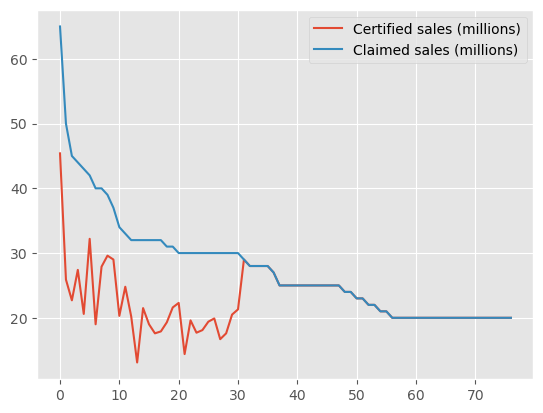

In [143]:
hit_albums.plot()

We can also use bar-charts instead of line-charts:

<Axes: ylabel='Artist'>

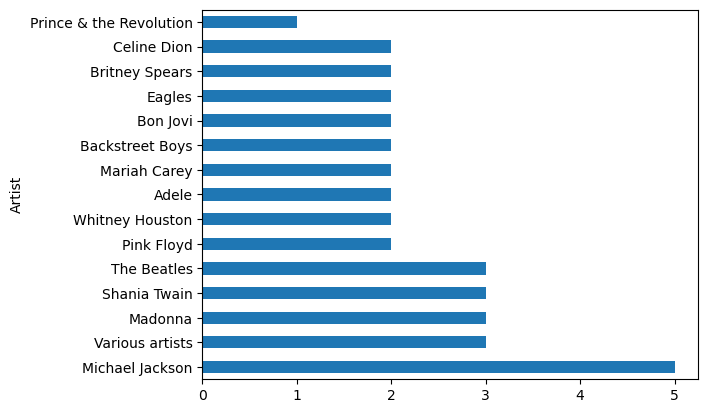

In [62]:
hit_albums.groupby("Artist").count()["Album"].sort_values(ascending=False)[:15].plot(kind="barh")
# and the horizontal bar version 


<Axes: xlabel='Certified sales (millions)', ylabel='Claimed sales (millions)'>

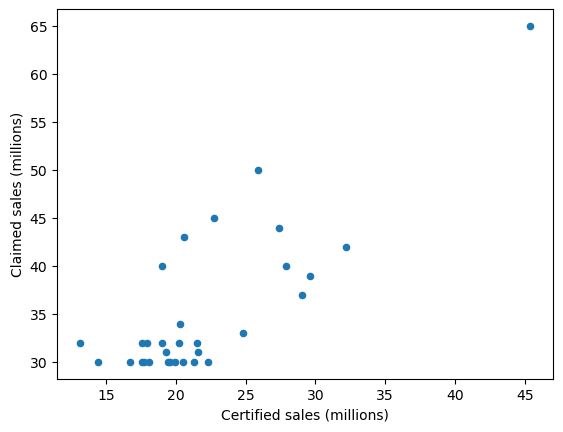

In [63]:
hit_albums.plot.scatter(x="Certified sales (millions)", y="Claimed sales (millions)")

Or a histogram: 

In [68]:
# Here we first cast the column to a numeric type
hit_albums["Certified Sales"] = pd.to_numeric(hit_albums["Certified sales (millions)"])
hit_albums["Claimed Sales"] = pd.to_numeric(hit_albums["Claimed sales (millions)"])
hit_albums.dtypes

Artist                         object
Album                          object
Released                        int64
Genre                          object
Certified sales (millions)    float64
Claimed sales (millions)      float64
Certified Sales               float64
Claimed Sales                 float64
dtype: object

<Axes: ylabel='Frequency'>

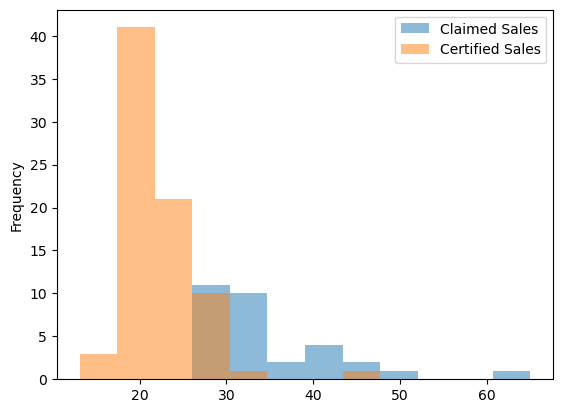

In [77]:
hit_albums[["Claimed Sales", "Certified Sales"]].plot.hist(bins=12, alpha=0.5)

# Working with Dates

Pandas is pretty good at working with dates. When you initially load a dataset, chances are the date will be provided as a string: 




In [84]:
team = pd.DataFrame({
        "Name":["Joe Coder", "Roberta Hacker", "Ludmilla Designer", "Devin Opers"],
        "Years Experience":[4, 4, 3, 5],
        "Date Joined":["2022-11-03", "2023-04-01","2019-12-24" ,"2018-05-01"]
    })
team


,Name,Years Experience,Date Joined
0,Joe Coder,4,2022-11-03
1,Roberta Hacker,4,2023-04-01
2,Ludmilla Designer,3,2019-12-24
3,Devin Opers,5,2018-05-01


In [85]:
# show column data types
team.dtypes

Name                object
Years Experience     int64
Date Joined         object
dtype: object

The [`to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function lets you parse dates: 

In [87]:
team["Date Joined"] = pd.to_datetime(team["Date Joined"])
team.dtypes

Name                        object
Years Experience             int64
Date Joined         datetime64[ns]
dtype: object

To access individual elements of a date, you can use the [`dt` fields](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html)

In [161]:
team["month joined"] = team["Date Joined"].dt.month
team["quater joined"] = team["Date Joined"].dt.quarter
team

,Name,Years Experience,Date Joined,month joined,quater joined
0,Joe Coder,4,2022-11-03,11,4
1,Roberta Hacker,4,2023-04-01,4,2
2,Ludmilla Designer,4,2019-12-24,12,4
3,Devin Opers,5,2018-05-01,5,2


How long has each of those team members been with the company as of today? 

In [89]:
team["days since joined"] = (pd.to_datetime("today") - team["Date Joined"]).dt.days
team

,Name,Years Experience,Date Joined,days since joined
0,Joe Coder,4,2022-11-03,300
1,Roberta Hacker,4,2023-04-01,151
2,Ludmilla Designer,3,2019-12-24,1345
3,Devin Opers,5,2018-05-01,1947


# Data Visualization with Python and First Steps in Matplotlib

To be frank: the Python data visualization environment is a MESS. It remindes me of this: 

![](standards.png)

## Visualization Libraries in Python

### Charting Libraries

First, there is the mother of all Python plotting libraries, [Matplotlib](https://matplotlib.org/). We will study Matplotlib because it's the most used, very flexible, well maintained and documented, and the basis of more advanced charting libraries. 

The built-in [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) is actually based on Matplotlib, and it's good to use it whenever you can. 

Another library that we will learn about is [Seaborn](https://seaborn.pydata.org/). It is also based on Matplotlib, but provides several higher-level extensions that makes it easy to create more advanced plots. 

These tools generally can be used to create figures independent of Jupyter, in contrast to the ones listed below. Also, while interactivity is possible, it tends to be quite limited, in contrast to Altair and Plotly that are interactive by default.  
 

### Web-based Vis tools

The tools in this category create web-based visualizations. That means that they typically depend on the Jupyter ecosystem, and you can't use them (easily) in vanilla Python. That's obviously not a problem for us, so we'll explore them too. There are two big libraries that fall into this category, Plotly and Altiar.


[Plotly](https://plot.ly/python/) is a charting library, in some sense similar to Seaborn. A very similar alternative is [Bokeh](https://bokeh.pydata.org/en/latest/). You can make nice interactive graphs with both of them, but they do have limited flexibility. We won't teach plot.ly or bokeh in this course, but it could be a useful option if you want to generate interactive plots without Altair

[Vega-Altair](https://altair-viz.github.io/) (short Altair), is a visualization library based on [Vega-Lite](https://vega.github.io/vega-lite/). In contrast to all of the other libraries we've talked about so far, it is NOT a charting library, i.e., there is no ``scatterplot()'' function. Instead it's a grammar based on Wilkinson's grammar of graphics. What that means is that you take graphic primitives (marks), like points, and encode data on them that transform the mark based on the data (channel), such as positioning a point. This is very flexible and powerfull, but obviously it's a bit harder to use for complex charts than charting libraries. We'll look at Vega-Altair a bit later in the semester. 
 


### Specialized Vis Tools 

Finally, there are specialized libraries for certain types of charts or certain types of data. A few examples: 

* [PyComplexHeatMap](https://dingwb.github.io/PyComplexHeatmap/build/html/index.html) which can be used for drawing complex heat maps as are common in life science publications. 
* [UpSet Plots](https://upset.app/) for set visualization.
* [NetworkX](https://networkx.org/) and [PyVis](https://pyvis.readthedocs.io/en/latest/index.html#) for network wrangling and visualziation.
* [GeoPandas](https://geopandas.org/en/stable/getting_started/introduction.html) and others for map visualization. 

We'll cover all of these in the future. 

# Matplotlib

Matplotlib is a visualization library that is inspired by teh Matlab plotting library. It's powerful and widely used, and there's basially no way around it in Python. So let's dig in.

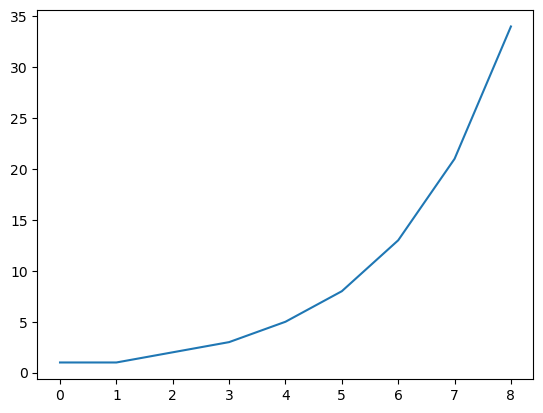

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# code after a % are ipython specific instructions
# this command tells Jupyter/ipython that we want to create the visualizations
# inline in this notebook instead of as files to save.
%matplotlib inline

# an example data vector
fib_series = [1,1,2,3,5,8,13,21,34]

# here we run a simple plot command to create a line chart
plt.plot(fib_series)

The `.plot` command uses a [`figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) to plot in. If no figure has been defined, it will automatically create one. If there is already a figure, it will plot to the latest figure. 

Here we create a figure manually: 

In [110]:
# we create a figure with size 10 by 10 inches
fig = plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

The figure by itself doesn't plot anyhing. We have to add a [`subplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) to it. A subplot is in pracice also an [`Axes`](https://matplotlib.org/stable/api/axes_api.html). An axes is where you control everything about a specific plot. Note the difference to [`axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) which are the actual axis with ticks and legends and so on. 

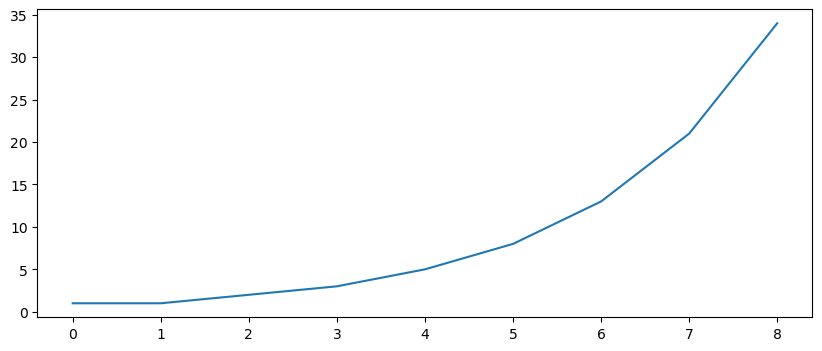

In [111]:
# figsize defines the size of the plot in inches - 10 wide by 6 high here. 
fig = plt.figure(figsize=(10, 4))
# add a suplot to a grid of 1x1, return the 1st figure
my_plot = fig.add_subplot(1,1,1)
# plotting a data array
my_plot.plot(fib_series)

Here we add a title and axis labels: 

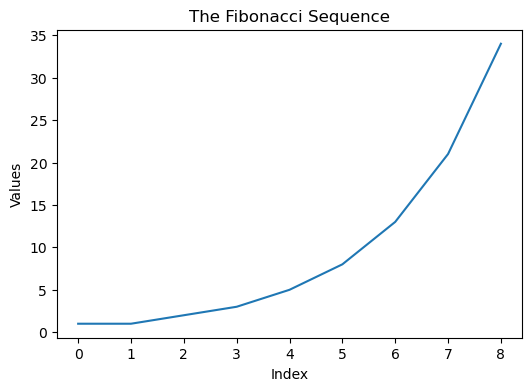

In [126]:
fig = plt.figure(figsize=(6, 4))
my_plot = fig.add_subplot(1,1,1)
my_plot.set_title('The Fibonacci Sequence')
my_plot.set_xlabel("Index")
my_plot.set_ylabel("Values")
my_plot.plot(fib_series)

## Explicit and Implicit Styles

Matplotlib allows you to create figures using either *explicit* or *implicit* style. You kind-of have to know both, because exiting code and example uses either. So what are the differences? 

In **implicit** style, we use `pyplot` to create figures and axes: 

Text(0.5, 1.0, 'The Fibonacci Sequence')

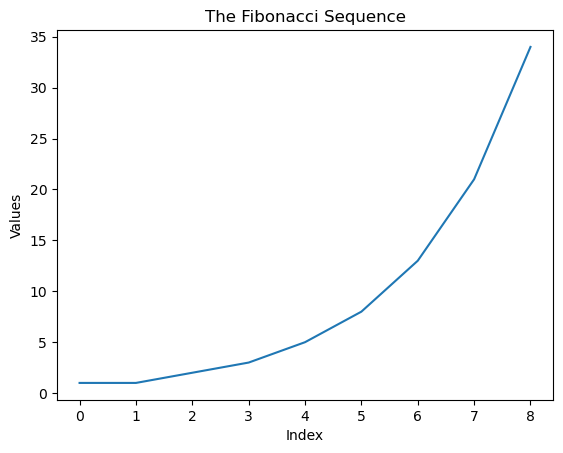

In [125]:
plt.plot(fib_series)
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("The Fibonacci Sequence")

Compare this to the **explicit** style we used previously, where we created a subplot / axes explicitly and then called on them: 

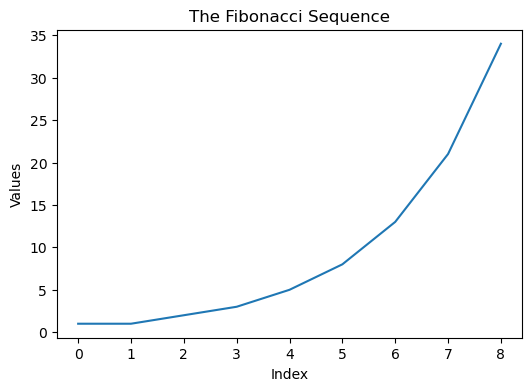

In [127]:
fig = plt.figure(figsize=(6, 4))
my_plot = fig.add_subplot(1,1,1)
my_plot.set_title('The Fibonacci Sequence')
my_plot.set_xlabel("Index")
my_plot.set_ylabel("Values")
my_plot.plot(fib_series)

So, which one should you use? Well, it depends on what you want to do. If you are just doing some quick data exploration, the pyplot interface is probably the easiest to use. If you are creating a complex visualization, the explicit / object-oriented interface is probably the better choice. We'll be using the explicit / object-oriented interface mostly, which is super-useful when creating multiple subplots. 

## Multi-Panel Figures 
Now let's create a figure with multiple subplots:

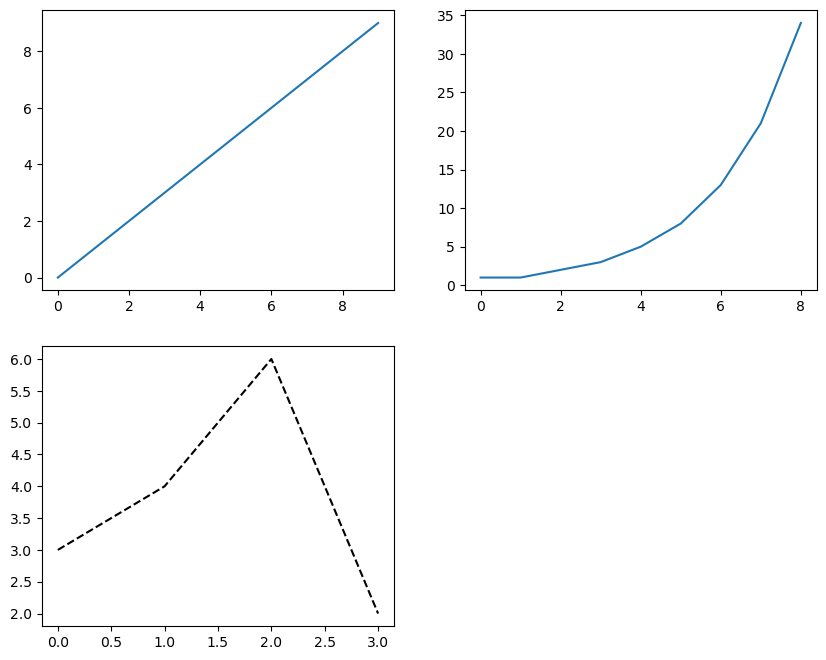

In [130]:
fig = plt.figure(figsize=(10, 8))
# create a subplot in a 2 by 2 grid, 
# return the subplot at position specified in third parameter
# these subplots are often called "axes"
# this is where explicit / oo mode realy pays off, because this would be impossible in pyplot mode
sub_fig_1 = fig.add_subplot(2,2,1)
sub_fig_2 = fig.add_subplot(2,2,2)
sub_fig_3 = fig.add_subplot(2,2,3)

# this will plot to the last figure used
# you shouldn't do that but rather use explicit subplot references if you have them
# k-- is a style option for a black dashed line
plt.plot([3, 4, 6, 2], "k--")

# here is how we can plot explicitly to a subfigure
sub_fig_1.plot(range(0,10))

sub_fig_2.plot(fib_series)

We can use the [`subplots`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=subplots#matplotlib.figure.Figure.subplots) shorthand to create multiple subplots that we can access form an array. 



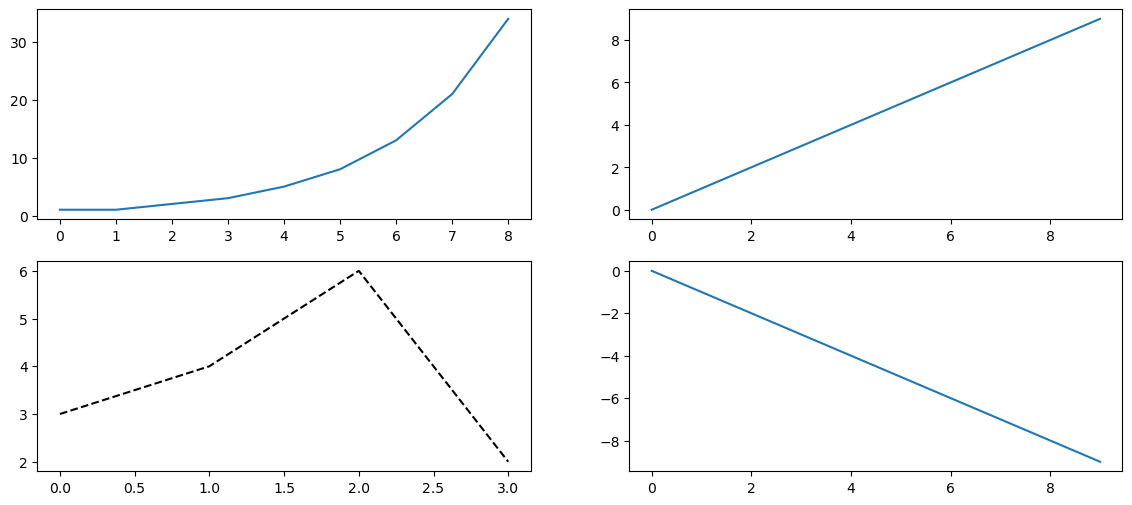

In [145]:
fig, subfigs = plt.subplots(2, 2, figsize=(14, 6))

subfigs[0][0].plot(fib_series)
subfigs[0][1].plot(range(10))
subfigs[1][0].plot([3, 4, 6, 2], "k--")
subfigs[1][1].plot(range(0,-10,-1))

## Styling Plots

You've already seen that we can use dashed lines, but there are many options to style your plot.  We can also plot multiple lines in the same axes. 

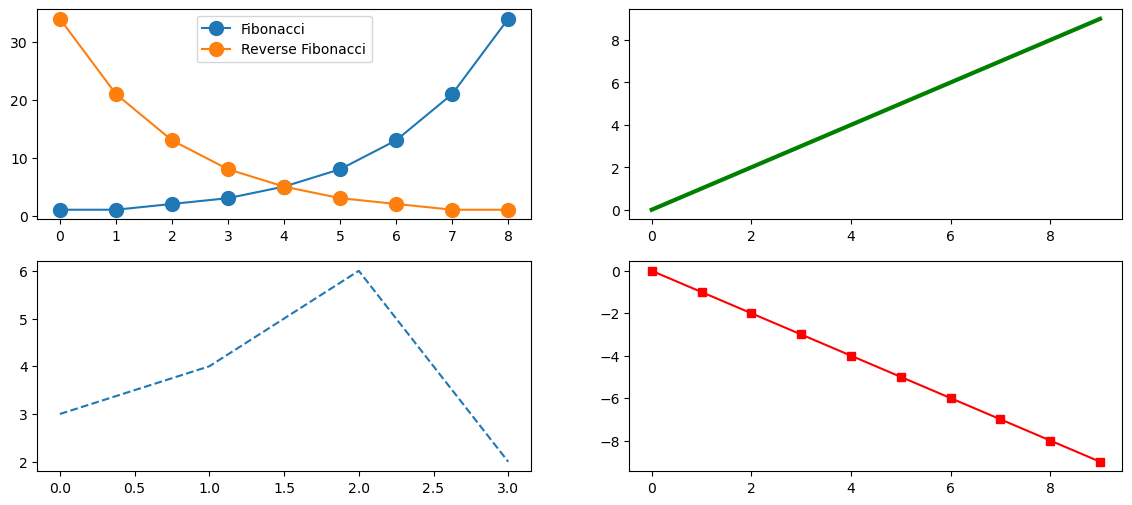

In [160]:
fig, subfigs = plt.subplots(2, 2, figsize=(14, 6))

# show the markers on the line
subfigs[0][0].plot(fib_series, marker="o", markersize=10, label="Fibonacci")
subfigs[0][0].plot(fib_series[::-1], marker="o", markersize=10, label="Reverse Fibonacci")
# add a legend
subfigs[0][0].legend()
# change the color of the line to green and linewidth to 3
subfigs[0][1].plot(range(10), color="green", linewidth=3)
# change the linestyle to dashed
subfigs[1][0].plot([3, 4, 6, 2], linestyle="dashed")
# change the marker to a square and the color to red
subfigs[1][1].plot(range(0,-10,-1), marker="s", color="red")

There are also shortcut [format strings](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot:~:text=called%20bubble%20chart).-,Notes,-Format%20Strings) that might be good to at least know about. 

They work like this: ```fmt = '[marker][line][color]'```

For example, a marker could be a square `s`, a line can be dotted `:` and the color can be green `g`, so that would be the format string `s:g`

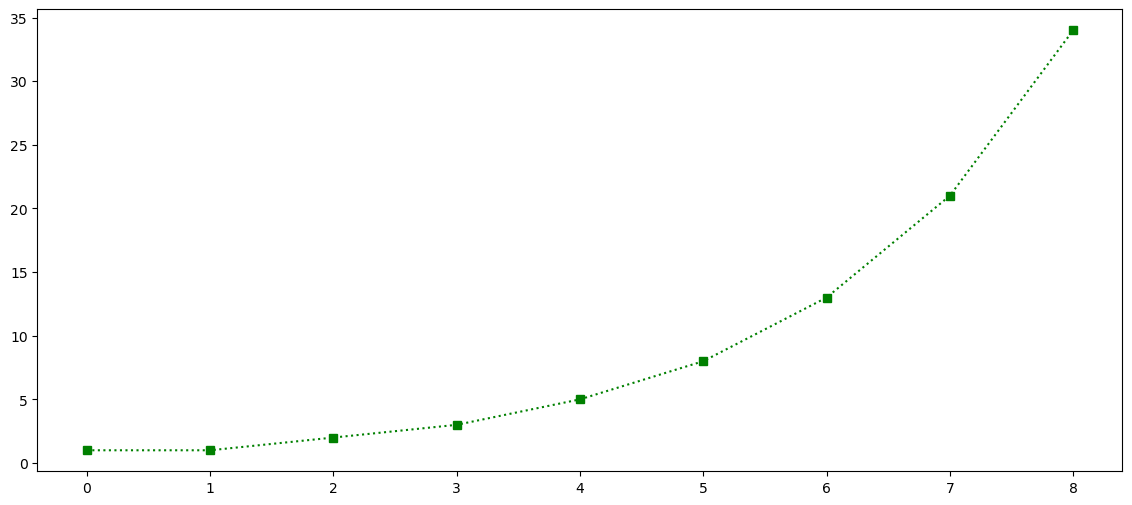

In [159]:
fig, subplot = plt.subplots(1, 1, figsize=(14, 6))
subplot.plot(fib_series, "s:g")

## Sidebar: ChatGPT and Co-Pilot

Note that this is really where ChatGPT and Co-Pilot shine. For minor stuff, I often write a comment line, and co-pilot fills it in: 

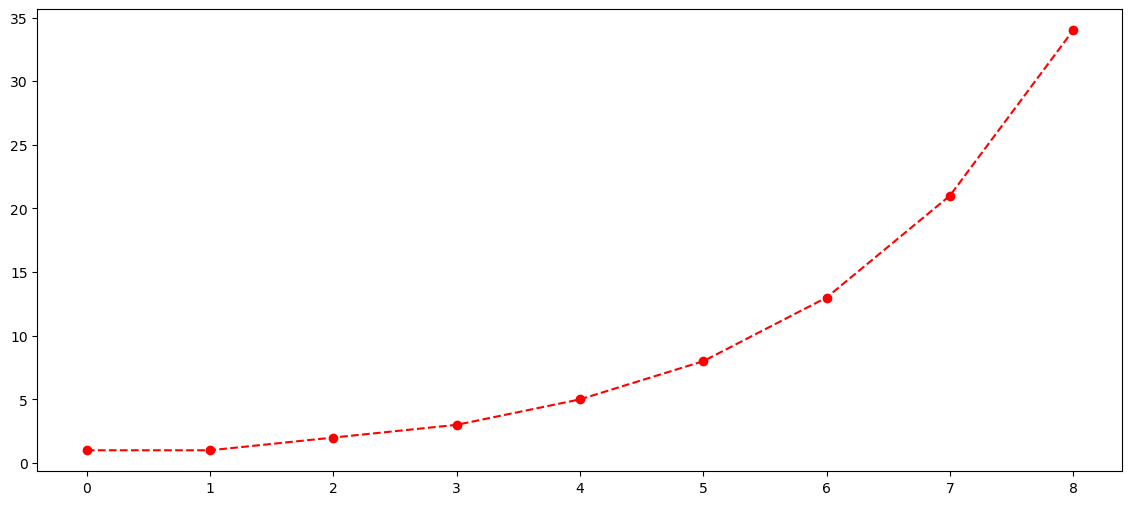

In [162]:
fig, subplot = plt.subplots(1, 1, figsize=(14, 6))
# a line chart based on the fib series with red circles as markers and an orange dashed line


Note that this didn't work for this case :) - but at least you have an idea what to start form. 

We can do more complex things with chatgpt. Here's a prompt: 

```
Create a matplotlib line chart with two lines. The first line should represent the first 10 fibonnachi numbers. The second, should be the same list but reversed. 
```

This is what chatgpt generated. Note that it had a bit of context from my history, and that yours might look quite different. 

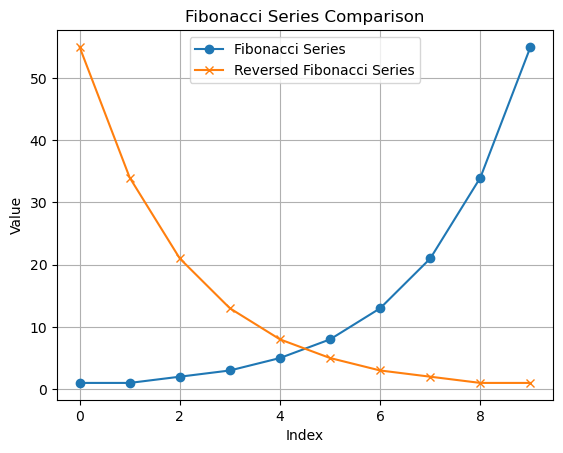

In [163]:
import matplotlib.pyplot as plt

fib_series = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
reversed_fib_series = fib_series[::-1]  # Reversed Fibonacci series

# Create a figure and axis objects
fig, ax = plt.subplots()

# Plot the first Fibonacci series
ax.plot(fib_series, label='Fibonacci Series', marker='o')

# Plot the reversed Fibonacci series
ax.plot(reversed_fib_series, label='Reversed Fibonacci Series', marker='x')

# Set title and labels
ax.set_title('Fibonacci Series Comparison')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

# Add legend
ax.legend()

# Add grid lines
ax.grid(True)

# Display the chart
plt.show()


You can then ask it to revise the plot. Here's my prompt: 

```now plot the two series in separate charts below each other```

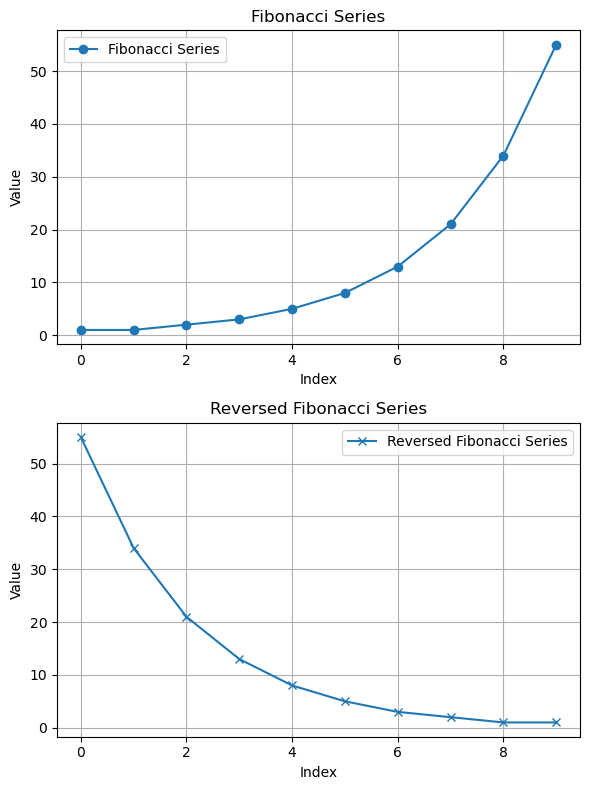

In [164]:
import matplotlib.pyplot as plt

fib_series = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
reversed_fib_series = fib_series[::-1]  # Reversed Fibonacci series

# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

# Plot the first Fibonacci series in the first subplot
ax1.plot(fib_series, label='Fibonacci Series', marker='o')
ax1.set_title('Fibonacci Series')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.legend()
ax1.grid(True)

# Plot the reversed Fibonacci series in the second subplot
ax2.plot(reversed_fib_series, label='Reversed Fibonacci Series', marker='x')
ax2.set_title('Reversed Fibonacci Series')
ax2.set_xlabel('Index')
ax2.set_ylabel('Value')
ax2.legend()
ax2.grid(True)

# Adjust layout to avoid overlapping titles
plt.tight_layout()

# Display the charts
plt.show()


## Different Plot Types

Next, we're also trying out a couple of different visualziation techniques: 

Visualizations for Correlations
 
 * [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)  
 
Visualizations for raw data, one dimension 
 * [Vertical Bar Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)
 * [Horizontal Bar Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh)
 * [Pie Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)
 
Visualizations for distributions 
 * [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot)
 * [Histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)
 * [Violin Plot](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.violinplot.html)

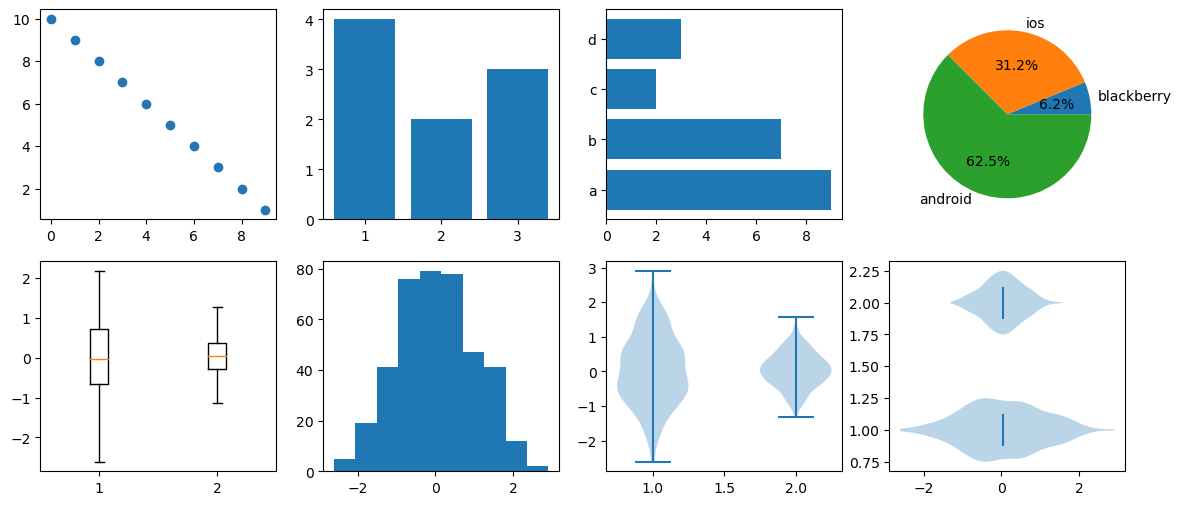

In [166]:
# generating random data drawing from a normal distribution 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html 
large_dist = np.random.randn(400)
small_dist = np.random.randn(400)*0.5


# a function because we'll reuse these later
def sample_figures():
    # define a figure with subfigures in 2 rows and 3 columns
    fig, subfigs = plt.subplots(2, 4, figsize=(14, 6))

    # Scatterplot. Pass two arrays for your x and y values.
    subfigs[0,0].scatter(range(0,10),range(10,0,-1))
    
    # Bar Chart. First array is x position, second is value (height) of data
    subfigs[0,1].bar([1, 2, 3], [4, 2, 3])
    
    # Horizontal bar chart. 
    # First array contains y positions (expressed as range), second contains data values (lengths of bars), 
    # tick_label is an array of labels
    subfigs[0,2].barh(range(0,4), [9, 7, 2, 3], tick_label=["a", "b", "c", "d"])
    
    # You can also (but maybe you shouldn't) do pie charts. First array is shares of total. 
    # labels in the same order of data. autopct defines how to format the numerical labels 
    # (here, one digit after comma)
    subfigs[0,3].pie([1, 5, 10], labels=["blackberry", "ios", "android"], autopct='%1.1f%%')
    
    # Box plots visualizing two distributions with 100 items each. 
    subfigs[1,0].boxplot([large_dist, small_dist])
    
    # A histogram visualizes a distribution. It takes one array, we can specify bins as second parameter 'bins'
    subfigs[1,1].hist(large_dist)
    
    # A violing plot also visualizes a distribution, using kernel density estimation.  
    subfigs[1,2].violinplot([large_dist, small_dist])
    
    # A violin plot with means and without extrema
    subfigs[1,3].violinplot([large_dist, small_dist], showmeans=True,
        showextrema=False, vert=False)

sample_figures()

And of course we can style all of these in many ways. 

### Heat Maps

Heat maps encoded matrix/tabular data using color. There are two ways to implement heatmaps in Matplotlib:

 * [pcolor](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html)
 * [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

imshow is used to display images (which are just matrices, where the pixels have a colorvalue). In practice, imshow and pcolor differ mainly in their coordinate system: the origin of imshow is at the top left (as is common for images), the origin of pcolor is at the bottom left.

For heatmaps, we need a [color map](https://matplotlib.org/tutorials/colors/colormaps.html). Matplotlib has many color maps baked in, also those from http://colorbrewer.org.

Note that heat maps for general numerical data isn't something that's fun to do in Matplotlib; we'll use other libraries for that. But it's fine for field data. 

In [168]:
# a helper function to create some 2D data based on a gaussian kernel.
def gkern(l=5, sig=1.):
    """
    creates gaussian kernel with side length l and a sigma of sig
    """
    ax = np.arange(-l // 2 + 1., l // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sig**2))
    return kernel / np.sum(kernel)

kernel = gkern(20, 5)

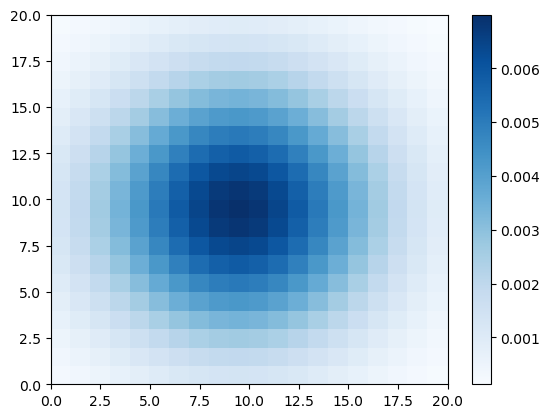

In [170]:
plt.style.use('default')
# select a blue color map
heatmap = plt.pcolor(kernel, cmap=plt.cm.Blues)
# plot the legend on the side
plt.colorbar(heatmap)

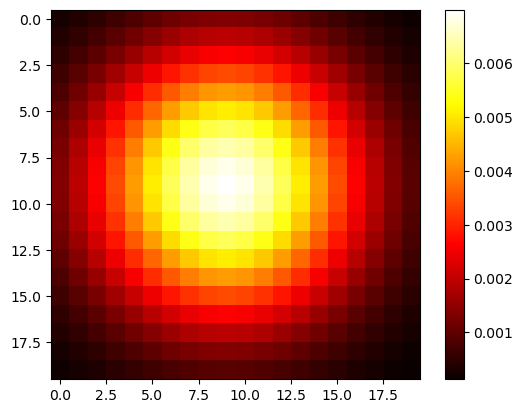

In [171]:
hm = plt.imshow(kernel, cmap='hot')
plt.colorbar(hm)

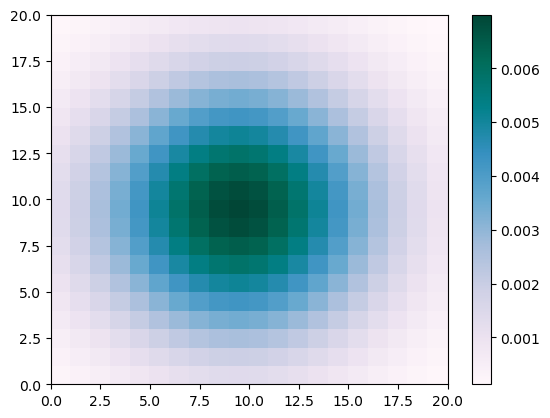

In [172]:
# a diverging color map from Color Brewer
heatmap = plt.pcolor(kernel, cmap=plt.cm.PuBuGn)
plt.colorbar(heatmap)

### Styling

Matplotlib has [different styles](https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html) that we can apply globally.

Here are a couple of examples:

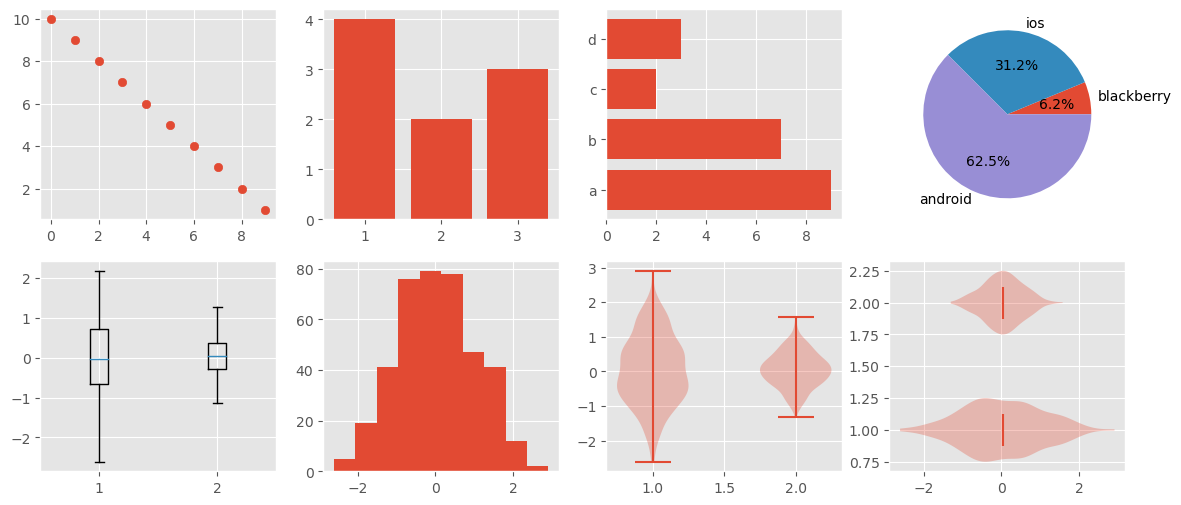

In [173]:
# ggplot style based on the popular R plotting library 
# we will be using this as a default in many lectures
plt.style.use('ggplot')
sample_figures()

/var/folders/8h/rgzr7hgs3hl4_v02y_sn21cc0000gn/T/ipykernel_91220/3748912098.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


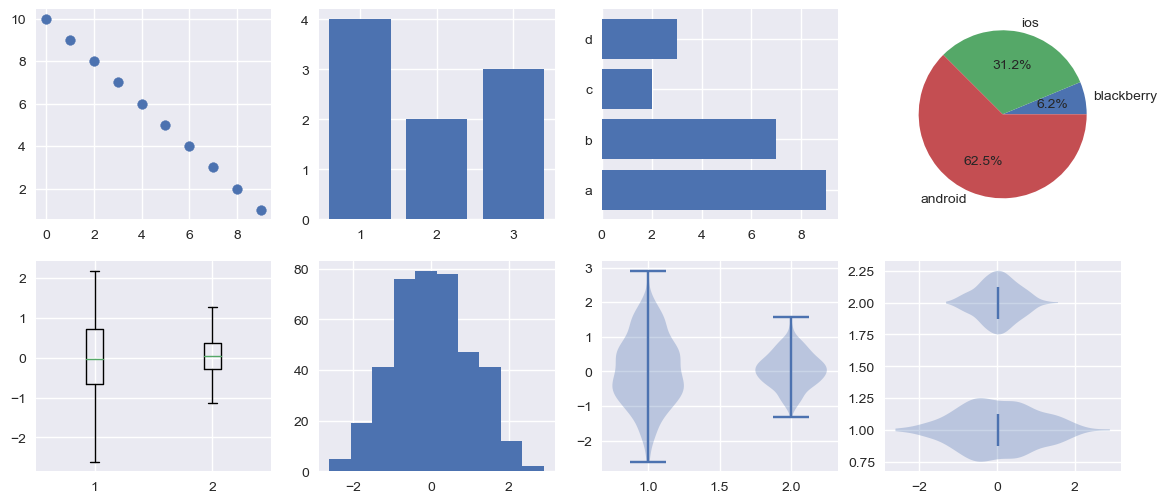

In [174]:
# style based on the seaborn library
plt.style.use('seaborn')
sample_figures()

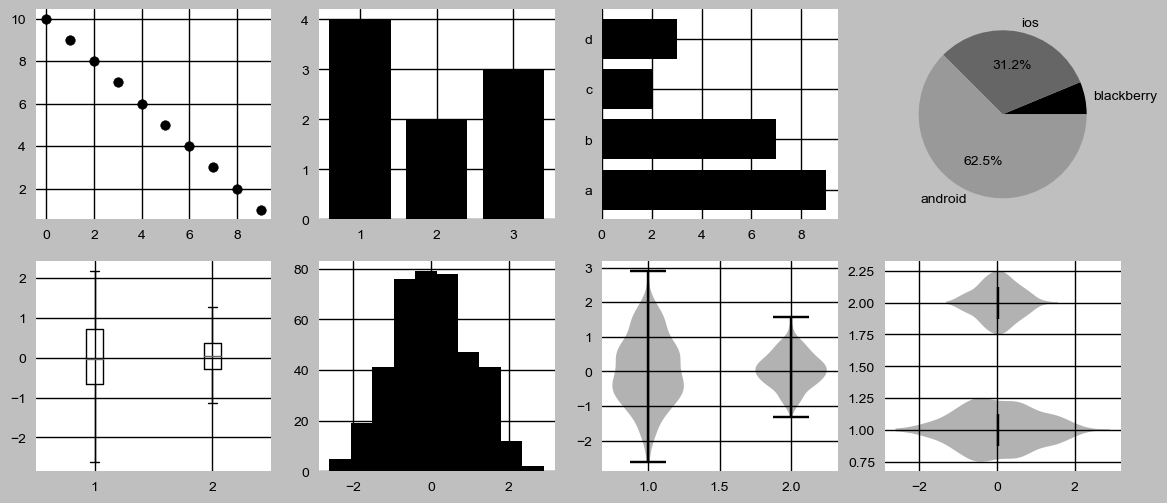

In [175]:
plt.style.use('grayscale')
sample_figures()

That's it for today; we'll explore more plotting soon!